In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('processed.csv')
data.head()

Age  Sex   RBC   PCV   MCV   MCH  MCHC   RDW    TLC  PLT/mm3   HGB  TEST
0   28    0  5.66  34.0  60.1  17.0  28.2  20.0  11.10    128.3   9.6     1
1   41    0  4.78  44.5  93.1  28.9  31.0  13.0   7.02    419.0  13.8     0
2   40    1  4.65  41.6  89.5  28.8  32.2  13.0   8.09    325.0  13.4     0
3   76    0  4.24  36.7  86.6  26.7  30.8  14.9  13.41    264.0  11.3     1
4   20    1  4.14  36.9  89.1  27.8  31.2  13.2   4.75    196.0  11.5     1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      364 non-null    int64  
 1   Sex      364 non-null    int64  
 2   RBC      364 non-null    float64
 3   PCV      364 non-null    float64
 4   MCV      364 non-null    float64
 5   MCH      364 non-null    float64
 6   MCHC     364 non-null    float64
 7   RDW      364 non-null    float64
 8   TLC      364 non-null    float64
 9   PLT/mm3  364 non-null    float64
 10  HGB      364 non-null    float64
 11  TEST     364 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 34.2 KB


In [5]:
data.describe()

Age         Sex         RBC         PCV         MCV         MCH  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean    44.917582    0.442308    4.278736   36.762912   87.509121   28.227143   
std     18.780854    0.497344    0.820166    6.830835    9.332164    3.865998   
min     11.000000    0.000000    1.360000   13.100000   55.700000   14.700000   
25%     28.000000    0.000000    3.780000   32.900000   83.175000   26.300000   
50%     44.500000    0.000000    4.335000   36.800000   87.950000   28.200000   
75%     60.000000    1.000000    4.800000   41.850000   91.875000   30.400000   
max     89.000000    1.000000    6.900000   56.900000  124.100000   41.400000   

             MCHC         RDW         TLC     PLT/mm3         HGB        TEST  
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000  
mean    32.053407   15.116511    8.863571  223.750824   11.907692    0.571429  
std      2.801790    2.176557    4.868502   99.407153    2.186686    0.495553  
min     23.600000   10.600000    2.000000   10.000000    4.200000    0.000000  
25%     30.300000   13.600000    5.900000  153.000000   10.600000    0.000000  
50%     31.700000   14.800000    7.935000  210.000000   12.100000    1.000000  
75%     33.300000   16.100000   10.205000  268.250000   13.400000    1.000000  
max     50.200000   29.200000   42.420000  660.000000   19.600000    1.000000

<AxesSubplot:>

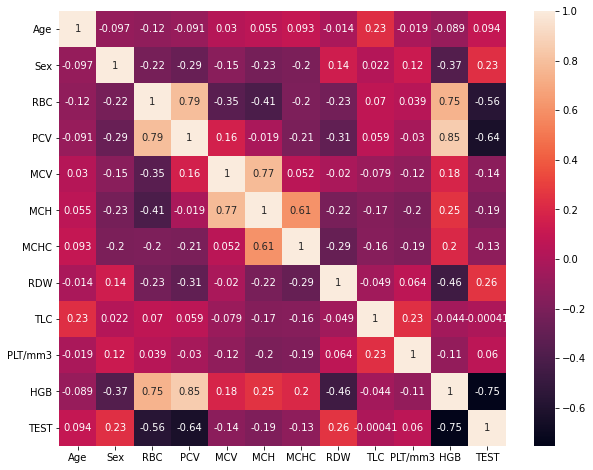

In [6]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [7]:
#set plot features
sns.set(style = 'darkgrid', color_codes = True) 
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)

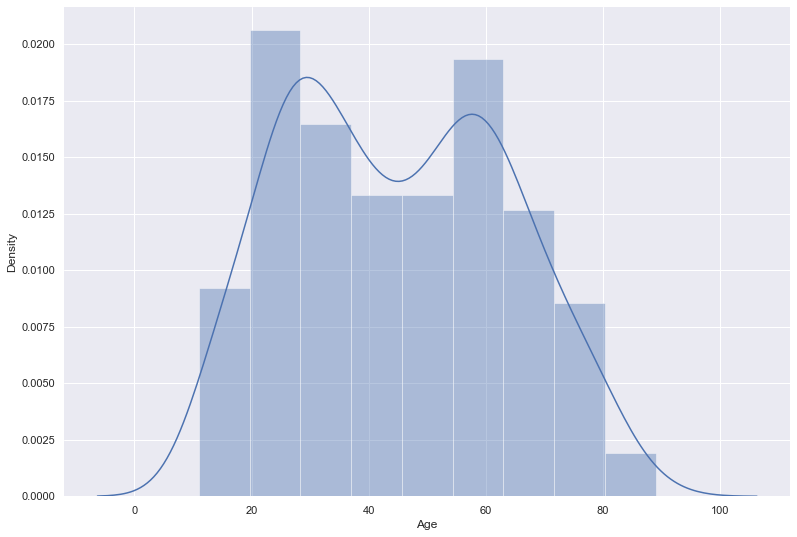

In [8]:
#create plot, a histogram of cost of living index
setPlt()
hist = sns.distplot(data['Age'])

<AxesSubplot:xlabel='TEST', ylabel='count'>

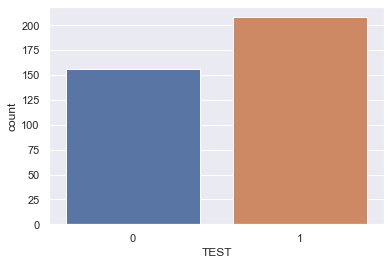

In [9]:
sns.countplot(x=data['TEST'])

In [10]:
data.shape

(364, 12)

# FEature Selection

In [11]:
Y = data['TEST']
X = data.drop('TEST',1)

In [12]:
X

Age  Sex   RBC   PCV   MCV   MCH  MCHC   RDW    TLC  PLT/mm3   HGB
0     28    0  5.66  34.0  60.1  17.0  28.2  20.0  11.10    128.3   9.6
1     41    0  4.78  44.5  93.1  28.9  31.0  13.0   7.02    419.0  13.8
2     40    1  4.65  41.6  89.5  28.8  32.2  13.0   8.09    325.0  13.4
3     76    0  4.24  36.7  86.6  26.7  30.8  14.9  13.41    264.0  11.3
4     20    1  4.14  36.9  89.1  27.8  31.2  13.2   4.75    196.0  11.5
..   ...  ...   ...   ...   ...   ...   ...   ...    ...      ...   ...
359   17    0  4.86  39.2  80.7  27.7  34.4  13.4   4.40    180.0  13.5
360   51    0  4.85  35.2  91.7  31.0  33.8  13.3   5.60    215.0  15.0
361   21    1  4.47  39.7  88.7  29.3  33.0  13.5   9.20    329.0  13.1
362   35    1  4.75  36.2  86.7  27.9  32.1  13.5   6.48    174.0  13.2
363   26    0  4.95  44.4  89.7  30.6  34.2  12.3   8.80    279.0  15.2

[364 rows x 11 columns]

In [13]:
Y

0      1
1      0
2      0
3      1
4      1
      ..
359    0
360    0
361    0
362    0
363    0
Name: TEST, Length: 364, dtype: int64

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Linear SVC

In [16]:
from sklearn.svm import LinearSVC
SVM = LinearSVC()
SVM.fit(X, Y)
predictions = SVM.predict(X)
val1 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for SVM: ")
print(classification_report(Y, predictions))

lsvc_prec = precision_score(Y, predictions)
lsvc_reca = recall_score(Y, predictions)
lsvc_f1 = f1_score(Y, predictions)

*Accuracy score for SVM:  76.92307692307693 

*Confusion Matrix for SVM: 
[[156   0]
 [ 84 124]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       156
           1       1.00      0.60      0.75       208

    accuracy                           0.77       364
   macro avg       0.82      0.80      0.77       364
weighted avg       0.85      0.77      0.76       364



In [17]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(SVM, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.90410959 0.94520548 0.89041096 0.87671233 0.81944444]
Average score: 0.89


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X, Y)
predictions = DT.predict(X)
val2 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for DT: ", val2, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for DT: ")
print(classification_report(Y, predictions))

dt_prec = precision_score(Y, predictions)
dt_reca = recall_score(Y, predictions)
dt_f1 = f1_score(Y, predictions)

*Accuracy score for DT:  100.0 

*Confusion Matrix for DT: 
[[156   0]
 [  0 208]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       208

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



In [19]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(DT, X,Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.         1.         1.         1.         0.95833333]
Average score: 0.99


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X, Y)
predictions = RF.predict(X)
val3 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for RF: ", val3, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for RF: ")
print(classification_report(Y, predictions))

rf_prec = precision_score(Y, predictions)
rf_reca = recall_score(Y, predictions)
rf_f1 = f1_score(Y, predictions)

*Accuracy score for RF:  100.0 

*Confusion Matrix for RF: 
[[156   0]
 [  0 208]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       208

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



In [21]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(RF, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.94520548 0.94520548 0.94520548 0.95890411 0.93055556]
Average score: 0.95


# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X, Y)
predictions = NB.predict(X)
val4 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for NB: ", val4, "\n")
print("*Confusion Matrix for NB: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for NB: ")
print(classification_report(Y, predictions))

nb_prec = precision_score(Y, predictions)
nb_reca = recall_score(Y, predictions)
nb_f1 = f1_score(Y, predictions)

*Accuracy score for NB:  87.63736263736264 

*Confusion Matrix for NB: 
[[136  20]
 [ 25 183]]
*Classification Report for NB: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       156
           1       0.90      0.88      0.89       208

    accuracy                           0.88       364
   macro avg       0.87      0.88      0.87       364
weighted avg       0.88      0.88      0.88       364



In [23]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(NB, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.93150685 0.83561644 0.87671233 0.8630137  0.875     ]
Average score: 0.88


# Stacking Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X, Y)
predictions = clf.predict(X)
val5 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for Stack: ", val5, "\n")
print("*Confusion Matrix for Stack: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for Stack: ")
print(classification_report(Y, predictions))

stack_prec = precision_score(Y, predictions)
stack_reca = recall_score(Y, predictions)
stack_f1 = f1_score(Y, predictions)

*Accuracy score for Stack:  99.45054945054946 

*Confusion Matrix for Stack: 
[[156   0]
 [  2 206]]
*Classification Report for Stack: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       156
           1       1.00      0.99      1.00       208

    accuracy                           0.99       364
   macro avg       0.99      1.00      0.99       364
weighted avg       0.99      0.99      0.99       364



In [25]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(clf, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.94520548 0.95890411 1.         0.93150685 0.93055556]
Average score: 0.95


# Voting Classifier

In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

estimator = []
estimator.append(('RF', RandomForestClassifier()))
estimator.append(('PAC', PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)))
estimator.append(('Boosting', AdaBoostClassifier()))
eclf1 = VotingClassifier(estimators = estimator, voting ='hard')

In [27]:
eclf1.fit(X, Y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(Y, predictions))

*Confusion Matrix for Voting Classifier: 
[[156   0]
 [  0 208]]


In [28]:
val6 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for Voting: ", val6, "\n")
print("*Classification Report for Voting: ")
print(classification_report(Y, predictions))

vot_prec = precision_score(Y, predictions)
vot_reca = recall_score(Y, predictions)
vot_f1 = f1_score(Y, predictions)

*Accuracy score for Voting:  100.0 

*Classification Report for Voting: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       208

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



In [29]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(eclf1, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.98630137 0.95890411 0.98630137 1.         0.95833333]
Average score: 0.98


# Comparison

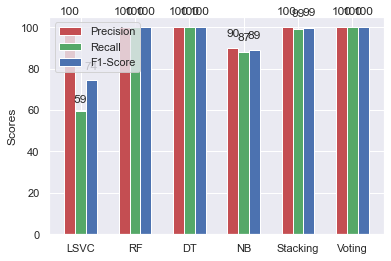

In [30]:
import numpy as np
import matplotlib.pyplot as plt

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [lsvc_prec*100,rf_prec*100,dt_prec*100,nb_prec*100,stack_prec*100,vot_prec*100]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [lsvc_reca*100,rf_reca*100,dt_reca*100,nb_reca*100,stack_reca*100,vot_reca*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [lsvc_f1*100,rf_f1*100,dt_f1*100,nb_f1*100,stack_f1*100,vot_f1*100]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('LSVC','RF','DT','NB','Stacking','Voting') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Precision', 'Recall', 'F1-Score') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [31]:
score = [val1,val2,val3,val4,val5,val6]

In [32]:
#make variabel for save the result and to show it
classifier = ('LSVC','RF','DT','NB','Stacking','Voting')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5]
[76.92307692307693, 100.0, 100.0, 87.63736263736264, 99.45054945054946, 100.0]


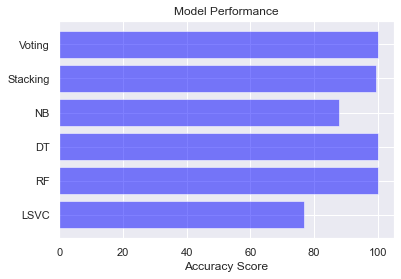

In [33]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Model Performance')
plt2.show()

In [34]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']